# Convolutional Neural Network

In convolutional neural networks (CNN), each neuron is only connected to a neighborhood of outputs below them and groups of neurons are constrainted to have the same weights. CNN excel in detecting patterns, making them most suitable suitable for audio and visual processing, but they can also be used in natural language processing and time series modelling.     

## A. Data

We will load the MNIST data and process it. There are three things we generally need to do when working with image data and CNN models:
1. Normalize the features.
2. Shape the features in the a specify format.
3. Convert the target to one-hot format, i.e. a vector of dummy variables.

First let us load the data:

In [1]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

We will take a look at the first sample:

In [2]:
x_train[0].shape

(28, 28)

In [3]:
# Tneth row
x_train[0][9]

array([  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
       205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

You can see that it is a 28 x 28 matrix with values ranging from 0 to 255. What it represents is a 28 x 28 pixel monochrome image of a handwritten digit, which we can show as an image:

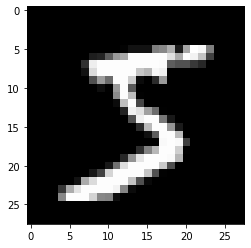

In [5]:
plt.imshow(x_train[0], cmap='gray')
plt.show()

Normalizing the features to `[0,1]` speeds up learning:

In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

xf = x_test.flatten()
print(np.max(xf))
print(np.min(xf))

1.0
0.0


Keras' CNN layers expect the features to be a 4D array, in the following format:
```
(samples,image-rows,image-columns,color-channels)
```
We will reshape the data to ensure this is the case:

In [5]:
# Features has to be in the following shape: (obs, rows, cols, color channels)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

Target is digit's value:

In [6]:
y_train[0]

5

For classification task, the common practice is to have one output neuron per class. We can use `keras.utils.to_categorical()` to convert the target value to one-hot format, which simply means a vector of a dummy variables:

In [7]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## B. Model

Now we build our model. First up is a standard convolutional neural network.


### B1. Standard Convolutional Neural Network

The model has the following structure:

1. Input
2. Convolution layer
3. Pooling layer
4. Repeat 2. and 3. if necessary
5. Flatten 2D output to 1D
6. Fully-connected layers
7. Final output

Dropout can be added at each stage as needed.

In [5]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

#Settings
batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

# The data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Features has to be in the following shape: (obs, rows, cols, color channels)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# Normalize features
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Model
inputs = Input(shape=input_shape)
x = Conv2D(6, kernel_size=(5, 5),
                 activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(16, (5, 5), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(120, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
469/469 [==============================] - 11s 23ms/step - loss: 0.5057 - accuracy: 0.8400 - val_loss: 0.1043 - val_accuracy: 0.9668
Epoch 2/10
469/469 [==============================] - 10s 22ms/step - loss: 0.1670 - accuracy: 0.9516 - val_loss: 0.0679 - val_accuracy: 0.9788
Epoch 3/10
469/469 [==============================] - 11s 23ms/step - loss: 0.1249 - accuracy: 0.9633 - val_loss: 0.0515 - val_accuracy: 0.9839
Epoch 4/10
469/469 [==============================] - 11s 22ms/step - loss: 0.1051 - accuracy: 0.9696 - val_loss: 0.0493 - val_accuracy: 0.9842
Epoch 5/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0917 - accuracy: 0.9727 - val_loss: 0.0451 - val_accuracy: 0.9859
Epoch 6/10
469/469 [==============================] - 11s 22ms/step - loss: 0.0820 - accuracy: 0.9767 - val_loss: 0.0393 - val_accuracy: 0.9883
Epoch 7/10
469/469 [==============================] - 11s 22ms/step - loss: 0.0747 - accuracy: 0.9782 - val_loss: 0.0399 - val_accuracy:

### B2. Residual Network (ResNet)

Residual networks adds the output from a lower layer to that of several layers higher. This helps training by shortening the path back-propagation has to take to reach the lower layer.

A ResNet model has the following structure:

1. Input
2. Convolution 
3. Pooling layer
4. Convolution layer A
5. Convolution layer B
6. Add output of 3. and 5.
4. Repeat 3. to 6. if necessary
5. Flatten 2D output to 1D
6. Fully-connected layers
7. Final output


In [1]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Dropout,Flatten,Add
from tensorflow.keras.layers import Conv2D, MaxPooling2D

#Settings
batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

# The data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Features has to be in the following shape: (obs, rows, cols, color channels)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# Normalize features
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Model
inputs = Input(shape=input_shape)
x = Conv2D(6, kernel_size=(5, 5),
              activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)

# A residual block
x1 = Conv2D(6, kernel_size=(5, 5),
               activation='relu',
               padding='same')(x)
x2 = Conv2D(6, kernel_size=(5, 5),
               activation='relu',
               padding='same')(x1)
x = Add()([x,x2])

# The rest is the same as before
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(120, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2021-12-03 22:48:56.449159: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-12-03 22:48:56.449199: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (scrp-login-2): /proc/driver/nvidia/version does not exist
2021-12-03 22:48:56.449588: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-03 22:48:57.365180: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
469/469 [==============================] - 20s 41ms/step - loss: 0.5579 - accuracy: 0.8169 - val_loss: 0.1086 - val_accuracy: 0.9657
Epoch 2/10
469/469 [==============================] - 19s 41ms/step - loss: 0.1895 - accuracy: 0.9443 - val_loss: 0.0667 - val_accuracy: 0.9787
Epoch 3/10
469/469 [==============================] - 19s 41ms/step - loss: 0.1426 - accuracy: 0.9585 - val_loss: 0.0532 - val_accuracy: 0.9826
Epoch 4/10
469/469 [==============================] - 19s 41ms/step - loss: 0.1204 - accuracy: 0.9651 - val_loss: 0.0468 - val_accuracy: 0.9847
Epoch 5/10
469/469 [==============================] - 19s 41ms/step - loss: 0.1031 - accuracy: 0.9694 - val_loss: 0.0431 - val_accuracy: 0.9864
Epoch 6/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0897 - accuracy: 0.9744 - val_loss: 0.0352 - val_accuracy: 0.9880
Epoch 7/10
469/469 [==============================] - 19s 40ms/step - loss: 0.0839 - accuracy: 0.9753 - val_loss: 0.0364 - val_accuracy:

## C. Running Cluster

Training will be faster if we use more CPU cores, but it will be *a lot* faster if we use a GPU. The simple ResNet we use in this notebook are available as `resnet-mnist.py` under the 'Examples' folder.

If you using the Department of Economics' SCRP HPC Cluster, you can run the IMDB example on a GPU by typing the following commands in a terminal:

```
conda activate tensorflow
gpu python [path]/resnet-mnist.py
```

This runs the script on the slowest available GPU on the cluster. This usually means a GTX 1050 Ti.
The speed up is going to be much more impressive if we use the fastest GPU available:
```
gpu ---gpus=rtx3090:1 python [path]/resnet-mnist.py

```